# Agregando informações por Setores, de Macro-Áreas e eixos de Reestruturação urbana

In [1]:
# Carrengando um complemento para visualizar quanto tempo demoram as tarefas

%load_ext autotime

In [2]:
from pathlib import Path
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

## Espacializando as quadras

In [3]:
# Carregando geometria das quadras fiscais
gdf_quadras = gpd.GeoDataFrame.from_file(f'zip://GIS/SIRGAS_SHP_quadraMDSF.zip!SIRGAS_SHP_quadraMDSF')

In [4]:
gdf_quadras['sq'] = gdf_quadras.qd_setor + gdf_quadras.qd_fiscal

In [5]:
gdf_quadras = gdf_quadras.loc[gdf_quadras.qd_tipo == 'F'][['sq', 'geometry']].dissolve(by='sq')

In [6]:
gdf_quadras.geometry = gdf_quadras.representative_point()

## Definindo as áreas de agregação

In [7]:
gdf_macroarea = gpd.GeoDataFrame.from_file(f'zip://GIS/PDE_2-Macroarea.zip!sirgas_PDE_2-Macroarea.shp')

In [8]:
# gdf_macroarea.plot()

In [9]:
# Possível agrupamento
gdf_macroarea.nm_perimet.unique()

array(['Macroarea de Estruturacao Metropolitana',
       'Macroarea de Urbanizacao Consolidada',
       'Macroarea de Qualificacao da Urbanizacao',
       'Macroarea de Reducao da Vulnerabilidade Urbana',
       'Macroarea de Reducao da Vulnerabilidade Urbana e Recuperacao Ambiental',
       'Macroarea de Controle e Qualificacao Urbana e Ambiental',
       'Macroarea de Contencao Urbana e Uso Sustentavel',
       'Macroarea de Preservacao dos Ecossistemas Naturais'], dtype=object)

In [10]:
gdf_macroarea = \
gdf_macroarea.\
loc[:, ['nm_perimet', 'geometry']].\
dissolve(by='nm_perimet').\
reset_index()

<AxesSubplot:>

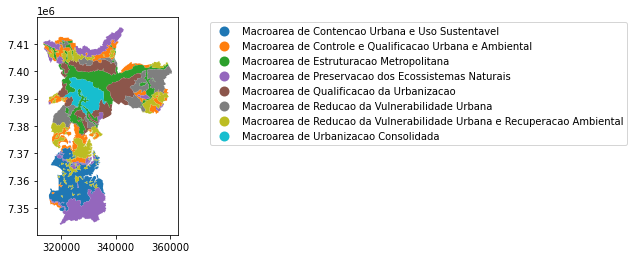

In [11]:
fig, ax = plt.subplots(1, 1)
gdf_macroarea.plot(column='nm_perimet', legend=True, ax=ax, \
                   legend_kwds={'bbox_to_anchor': (4.2, 1)})

In [12]:
gdf_setores_estruturacao = gpd.GeoDataFrame.from_file(f'zip://GIS/PDE_2A-Setores-MEM.zip!sirgas_PDE_2A-Setores-MEM.shp')

In [13]:
# gdf_setores_estruturacao.plot()

In [14]:
# Possível agrupamento
gdf_setores_estruturacao.nm_perimet.unique()

array(['Arco Tiete', 'Fernao Dias', 'Avenida Cupece', 'Arco Pinheiros',
       'Arco Jurubatuba', 'Faria Lima-Agua Espraiada-Chucri Zaidan',
       'Arco Leste', 'Centro', 'Arco Tamanduatei', 'Arco Jacu-Pessego',
       'Noroeste'], dtype=object)

In [15]:
gdf_setores_estruturacao = \
gdf_setores_estruturacao.\
loc[:, ['nm_perimet', 'geometry']].\
dissolve(by='nm_perimet').\
reset_index()

<AxesSubplot:>

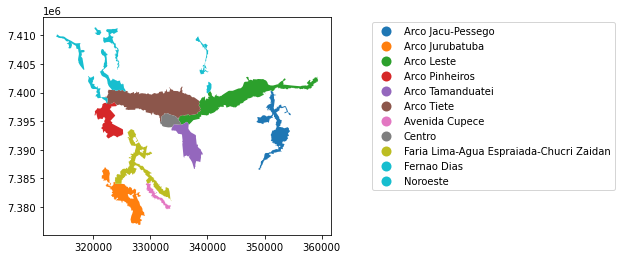

In [16]:
fig, ax = plt.subplots(1, 1)
gdf_setores_estruturacao.plot(column='nm_perimet', ax=ax, legend=True, \
                              legend_kwds={'bbox_to_anchor': (2, 1)})

In [17]:
gdf_eixos_estruturacao = gpd.GeoDataFrame.from_file(f'zip://GIS/PDE_3-Eixos-EETU.zip!sirgas_PDE_3-Eixos-EETU.shp')

<AxesSubplot:>

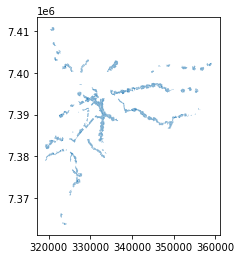

In [18]:
gdf_eixos_estruturacao.plot()

In [19]:
len(gdf_eixos_estruturacao.cd_perimet.unique())

4818

In [20]:
gdf_eixos_estruturacao = \
gdf_eixos_estruturacao.\
loc[:, ['sg_macro_d', 'geometry']].\
dissolve(by='sg_macro_d')

## Relacionando a área de agregação com as quadras

In [21]:
gdf_macroarea_quadras = \
gpd.sjoin(left_df = gdf_macroarea,\
          right_df = gdf_quadras,\
          how = "inner", \
          op = 'contains').\
rename(columns = {'index_right':'sq', 'nm_perimet':'agregacao'})

In [22]:
gdf_macroarea_quadras

,agregacao,geometry,sq
0,Macroarea de Contencao Urbana e Uso Sustentavel,"MULTIPOLYGON (((320025.509 7350180.642, 320018...",264002
0,Macroarea de Contencao Urbana e Uso Sustentavel,"MULTIPOLYGON (((320025.509 7350180.642, 320018...",264004
0,Macroarea de Contencao Urbana e Uso Sustentavel,"MULTIPOLYGON (((320025.509 7350180.642, 320018...",264003
0,Macroarea de Contencao Urbana e Uso Sustentavel,"MULTIPOLYGON (((320025.509 7350180.642, 320018...",264001
0,Macroarea de Contencao Urbana e Uso Sustentavel,"MULTIPOLYGON (((320025.509 7350180.642, 320018...",265027
...,...,...,...
7,Macroarea de Urbanizacao Consolidada,"MULTIPOLYGON (((327517.792 7391529.376, 327517...",041090
7,Macroarea de Urbanizacao Consolidada,"MULTIPOLYGON (((327517.792 7391529.376, 327517...",041261
7,Macroarea de Urbanizacao Consolidada,"MULTIPOLYGON (((327517.792 7391529.376, 327517...",041265
7,Macroarea de Urbanizacao Consolidada,"MULTIPOLYGON (((327517.792 7391529.376, 327517...",041064


In [23]:
gdf_setores_estruturacao_quadras = \
gpd.sjoin(left_df = gdf_setores_estruturacao,\
          right_df = gdf_quadras,\
          how = "inner", \
          op = 'contains').\
rename(columns = {'index_right':'sq', 'nm_perimet':'agregacao'})

In [24]:
gdf_setores_estruturacao_quadras

,agregacao,geometry,sq
0,Arco Jacu-Pessego,"POLYGON ((351347.589 7400186.921, 351343.029 7...",140350
0,Arco Jacu-Pessego,"POLYGON ((351347.589 7400186.921, 351343.029 7...",140127
0,Arco Jacu-Pessego,"POLYGON ((351347.589 7400186.921, 351343.029 7...",140140
0,Arco Jacu-Pessego,"POLYGON ((351347.589 7400186.921, 351343.029 7...",140353
0,Arco Jacu-Pessego,"POLYGON ((351347.589 7400186.921, 351343.029 7...",140416
...,...,...,...
10,Noroeste,"MULTIPOLYGON (((313492.675 7409881.256, 313485...",078106
10,Noroeste,"MULTIPOLYGON (((313492.675 7409881.256, 313485...",078107
10,Noroeste,"MULTIPOLYGON (((313492.675 7409881.256, 313485...",078321
10,Noroeste,"MULTIPOLYGON (((313492.675 7409881.256, 313485...",077145


In [25]:
gdf_eixos_estruturacao_quadras = \
gpd.sjoin(left_df = gdf_eixos_estruturacao,\
          right_df = gdf_quadras,\
          how = "inner", \
          op = 'contains').\
reset_index().\
rename(columns = {'sg_macro_d':'agregacao', 'index_right':'sq'})


In [26]:
gdf_eixos_estruturacao_quadras

,agregacao,geometry,sq
0,EETU,"MULTIPOLYGON (((326796.833 7376111.000, 326801...",138087
1,EETU,"MULTIPOLYGON (((326796.833 7376111.000, 326801...",114070
2,EETU,"MULTIPOLYGON (((326796.833 7376111.000, 326801...",144005
3,EETU,"MULTIPOLYGON (((326796.833 7376111.000, 326801...",114071
4,EETU,"MULTIPOLYGON (((326796.833 7376111.000, 326801...",114377
...,...,...,...
4132,EETU,"MULTIPOLYGON (((326796.833 7376111.000, 326801...",076316
4133,EETU,"MULTIPOLYGON (((326796.833 7376111.000, 326801...",076319
4134,EETU,"MULTIPOLYGON (((326796.833 7376111.000, 326801...",076778
4135,EETU,"MULTIPOLYGON (((326796.833 7376111.000, 326801...",076317


## Carregando dados de IPTU agregado

In [27]:
gdf_iptu_agg = gpd.read_file('resultados/IPTU_2020-agregado-sq-uso-geo.gpkg')

In [28]:
# Calcular CA, TO, gabarito máximo, testada média
agg_ocup = {
    'area_construida':'sum',
    'area_terreno':'sum',
    'area_ocupada':'sum',
    'maximo_de_pavimentos':'max',
    'media_testada':'median'
}

df_iptu_agg = \
gdf_iptu_agg.groupby('sq').agg(agg_ocup).\
reset_index()

## Relacionando IPTU Agregado com MacroÁreas

In [29]:
df_iptu_agg_macroarea = \
df_iptu_agg.\
merge(gdf_macroarea_quadras, how='left', on='sq')

In [30]:
df_iptu_agg_macroarea.loc[df_iptu_agg_macroarea.agregacao.isna(), 'agregacao'] = 'Fora de MacroÁreas'

In [31]:
df_iptu_agg_macroarea = df_iptu_agg_macroarea.groupby('agregacao').agg(agg_ocup)

In [32]:
df_iptu_agg_macroarea['CA'] = df_iptu_agg_macroarea['area_construida'] / df_iptu_agg_macroarea['area_terreno']
df_iptu_agg_macroarea['TO'] = df_iptu_agg_macroarea['area_ocupada'] / df_iptu_agg_macroarea['area_terreno']

## Relacionando IPTU Agregado com Setores de Estruturação

In [33]:
df_iptu_agg_setores = \
df_iptu_agg.\
merge(gdf_setores_estruturacao_quadras, how='left', on='sq')

In [34]:
df_iptu_agg_setores.loc[df_iptu_agg_setores.agregacao.isna(), 'agregacao'] = 'Fora dos Setores'

In [35]:
df_iptu_agg_setores = df_iptu_agg_setores.groupby('agregacao').agg(agg_ocup)

In [36]:
df_iptu_agg_setores['CA'] = df_iptu_agg_setores['area_construida'] / df_iptu_agg_setores['area_terreno']
df_iptu_agg_setores['TO'] = df_iptu_agg_setores['area_ocupada'] / df_iptu_agg_setores['area_terreno']

## Relacionando IPTU Agregado com EETU

In [37]:
df_iptu_agg_eetu = \
df_iptu_agg.\
merge(gdf_eixos_estruturacao_quadras, how='left', on='sq')

In [38]:
df_iptu_agg_eetu.loc[df_iptu_agg_eetu.agregacao.isna(), 'agregacao'] = 'Cidade Excluindo EETU'

In [39]:
df_iptu_agg_eetu = df_iptu_agg_eetu.groupby('agregacao').agg(agg_ocup)

In [40]:
df_iptu_agg_eetu['CA'] = df_iptu_agg_eetu['area_construida'] / df_iptu_agg_eetu['area_terreno']
df_iptu_agg_eetu['TO'] = df_iptu_agg_eetu['area_ocupada'] / df_iptu_agg_eetu['area_terreno']

In [41]:
df_iptu_agg_eetu

,area_construida,area_terreno,area_ocupada,maximo_de_pavimentos,media_testada,CA,TO
agregacao,,,,,,,
Cidade Excluindo EETU,461882284,5.813575e+08,2.061550e+08,50,10.0,0.794489,0.354610
EETU,74721808,4.755346e+07,2.260113e+07,40,10.0,1.571322,0.475278


# Gerando resultados para todos os exercícios

In [52]:
agg_ocup = {
    'area_construida':'sum',
    'area_terreno':'sum',
    'area_ocupada':'sum',
    'maximo_de_pavimentos':'max',
    'media_testada':'median'
}

df_aggs = {
    'MacroÁrea':[],
    'Setor':[],
    'Eixo':[]
}

for path in Path('resultados').rglob('IPTU_*-agregado-sq-uso-geo.gpkg'):
    
    # Definindo o exercício
    exercicio = path.name[5:9]
    print(f'Processando {exercicio} ...')
    
    
    gdf_iptu_agg = gpd.read_file(f'resultados/IPTU_{exercicio}-agregado-sq-uso-geo.gpkg')
    
    df_iptu_agg = \
    gdf_iptu_agg.groupby('sq').agg(agg_ocup).\
    reset_index()
    
    aggs = {
        'MacroÁrea':gdf_macroarea_quadras,
        'Setor':gdf_setores_estruturacao_quadras,
        'Eixo':gdf_eixos_estruturacao_quadras
    }
    
    # Agregando por áreas
    for k in aggs:
        
        print(f' ... {k}')
        
        df_iptu_agg_k = \
        df_iptu_agg.\
        merge(aggs[k], how='left', on='sq')
        
        df_iptu_agg_k.loc[df_iptu_agg_k.agregacao.isna(), \
                          'agregacao'] = f'Fora de {k}'
        
        df_iptu_agg_k = df_iptu_agg_k.groupby('agregacao').agg(agg_ocup)
        
        df_iptu_agg_k['CA'] = \
        df_iptu_agg_k['area_construida'] / df_iptu_agg_k['area_terreno']

        df_iptu_agg_k['TO'] = \
        df_iptu_agg_k['area_ocupada'] / df_iptu_agg_k['area_terreno']
        
        df_iptu_agg_k = df_iptu_agg_k.reset_index()
        df_iptu_agg_k['exercicio'] = exercicio
        
        df_aggs[k].append(df_iptu_agg_k)

    

Processando 2019 ...
 ... MacroÁrea
 ... Setor
 ... Eixo
Processando 2006 ...
 ... MacroÁrea
 ... Setor
 ... Eixo
Processando 1999 ...
 ... MacroÁrea
 ... Setor
 ... Eixo
Processando 2010 ...
 ... MacroÁrea
 ... Setor
 ... Eixo
Processando 2005 ...
 ... MacroÁrea
 ... Setor
 ... Eixo
Processando 2016 ...
 ... MacroÁrea
 ... Setor
 ... Eixo
Processando 2013 ...
 ... MacroÁrea
 ... Setor
 ... Eixo
Processando 2017 ...
 ... MacroÁrea
 ... Setor
 ... Eixo
Processando 2003 ...
 ... MacroÁrea
 ... Setor
 ... Eixo
Processando 2000 ...
 ... MacroÁrea
 ... Setor
 ... Eixo
Processando 2012 ...
 ... MacroÁrea
 ... Setor
 ... Eixo
Processando 1996 ...
 ... MacroÁrea
 ... Setor
 ... Eixo
Processando 2001 ...
 ... MacroÁrea
 ... Setor
 ... Eixo
Processando 2011 ...
 ... MacroÁrea
 ... Setor
 ... Eixo
Processando 2007 ...
 ... MacroÁrea
 ... Setor
 ... Eixo
Processando 1998 ...
 ... MacroÁrea
 ... Setor
 ... Eixo
Processando 2018 ...
 ... MacroÁrea
 ... Setor
 ... Eixo
Processando 1995 ...
 ... Macro

In [54]:
for k in df_aggs:
    pd.concat(df_aggs[k]).to_csv(f'resultados/IPTU-uso-do-solo-agg-{k}.csv')